In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wrangle import *

# modeling methods
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusedesc,transactiondate
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,Single Family Residential,2017-07-21
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,Single Family Residential,2017-06-23
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,Single Family Residential,2017-06-30
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,Single Family Residential,2017-06-01
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,Single Family Residential,2017-08-23


In [4]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips', 'propertylandusedesc', 'transactiondate'],
      dtype='object')

In [5]:
df.fips.value_counts()

6037.0    17929
6059.0     7770
6111.0     2449
Name: fips, dtype: int64

In [6]:
# Converting fips to actual county name

df['county'] = df['fips'].replace({6037:'Los Angeles',6059:'Orange',6111:'Ventura'})

In [7]:
# Creating tax_rate column

df['tax_rate'] = (df['taxamount']/df['tax_value'])
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusedesc,transactiondate,county,tax_rate
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,Single Family Residential,2017-07-21,Los Angeles,0.012809
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,Single Family Residential,2017-06-23,Los Angeles,0.017045
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,Single Family Residential,2017-06-30,Los Angeles,0.015270
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,Single Family Residential,2017-06-01,Orange,0.011153
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,Single Family Residential,2017-08-23,Los Angeles,0.013064


In [8]:
# Remove Outliers

col_list = ['bedrooms','bathrooms','area','tax_value','taxamount','tax_rate']
df = remove_outliers(df,1.5,col_list)

In [9]:
# Imputing year_built with most_frequent value

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[['year_built']])
df[['year_built']] = imputer.transform(df[['year_built']])

In [10]:
df.isnull().any()

bedrooms               False
bathrooms              False
area                   False
tax_value              False
year_built             False
taxamount              False
fips                   False
propertylandusedesc    False
transactiondate        False
county                 False
tax_rate               False
dtype: bool

In [11]:
df.shape

(21757, 11)

In [12]:
# Creating a dataframe with county and tax_rate
tax_data = pd.DataFrame({'county':df.county,'tax_rate':df.tax_rate})
tax_data

,county,tax_rate
0,Los Angeles,0.012809
1,Los Angeles,0.017045
2,Los Angeles,0.015270
3,Orange,0.011153
4,Los Angeles,0.013064
...,...,...
28141,Los Angeles,0.014354
28142,Ventura,0.014285
28144,Orange,0.011916
28145,Orange,0.013676


In [13]:
tax_data.describe()

,tax_rate
count,21757.000000
mean,0.012534
std,0.001512
min,0.008702
25%,0.011597
50%,0.012284
75%,0.013211
max,0.017049


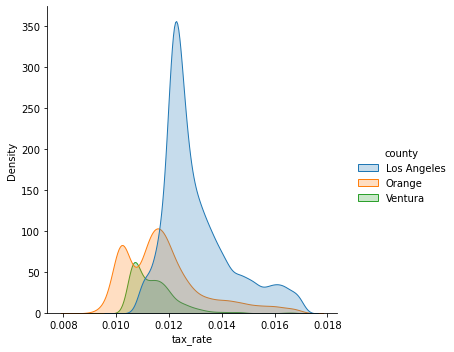

In [14]:
# Plotting distribution of tax_rate by county

sns.displot(tax_data, x="tax_rate", hue="county", kind='kde',fill=True)
plt.show()

In [15]:
df.corr()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,tax_rate
bedrooms,1.000000,0.577396,0.603854,0.198695,0.365316,0.202016,0.157455,-0.049573
bathrooms,0.577396,1.000000,0.774889,0.353345,0.552342,0.353356,0.143566,-0.135436
area,0.603854,0.774889,1.000000,0.429382,0.488199,0.425962,0.152884,-0.158650
tax_value,0.198695,0.353345,0.429382,1.000000,0.256820,0.983666,0.121563,-0.516220
year_built,0.365316,0.552342,0.488199,0.256820,1.000000,0.255531,0.319565,-0.108053
taxamount,0.202016,0.353356,0.425962,0.983666,0.255531,1.000000,0.058524,-0.392636
fips,0.157455,0.143566,0.152884,0.121563,0.319565,0.058524,1.000000,-0.363134
tax_rate,-0.049573,-0.135436,-0.158650,-0.516220,-0.108053,-0.392636,-0.363134,1.000000


In [16]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusedesc,transactiondate,county,tax_rate
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,Single Family Residential,2017-07-21,Los Angeles,0.012809
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,Single Family Residential,2017-06-23,Los Angeles,0.017045
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,Single Family Residential,2017-06-30,Los Angeles,0.015270
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,Single Family Residential,2017-06-01,Orange,0.011153
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,Single Family Residential,2017-08-23,Los Angeles,0.013064


Is there a trend with taxamount and the transactiondate

In [17]:
tax_and_date = pd.DataFrame({'tax_value':df.tax_value,'transactiondate':df.transactiondate})
tax_and_date

,tax_value,transactiondate
0,205123.0,2017-07-21
1,136104.0,2017-06-23
2,35606.0,2017-06-30
3,880456.0,2017-06-01
4,107110.0,2017-08-23
...,...,...
28141,200000.0,2017-08-31
28142,141877.0,2017-08-31
28144,465999.0,2017-08-31
28145,852813.0,2017-08-31


In [18]:
tax_and_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21757 entries, 0 to 28147
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tax_value        21757 non-null  float64
 1   transactiondate  21757 non-null  object 
dtypes: float64(1), object(1)
memory usage: 509.9+ KB


In [66]:
# Create a month column:
conditions =[
    (df.transactiondate.str.match('2017-05')),
    (df.transactiondate.str.match('2017-06')),
    (df.transactiondate.str.match('2017-07')),
    (df.transactiondate.str.match('2017-08'))]

values = ['May','June','July','August']

df['month'] = np.select(conditions, values)

conditions2 = [
    (df.month.str.match('May')),
    (df.month.str.match('June')),
    (df.month.str.match('July')),
    (df.month.str.match('August'))]

values2 = [1,2,3,4]

df['month_encoded'] = np.select(conditions2,values2)

df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusedesc,transactiondate,county,tax_rate,month,month_encoded
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,Single Family Residential,2017-07-21,Los Angeles,0.012809,July,3
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,Single Family Residential,2017-06-23,Los Angeles,0.017045,June,2
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,Single Family Residential,2017-06-30,Los Angeles,0.015270,June,2
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,Single Family Residential,2017-06-01,Orange,0.011153,June,2
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,Single Family Residential,2017-08-23,Los Angeles,0.013064,August,4


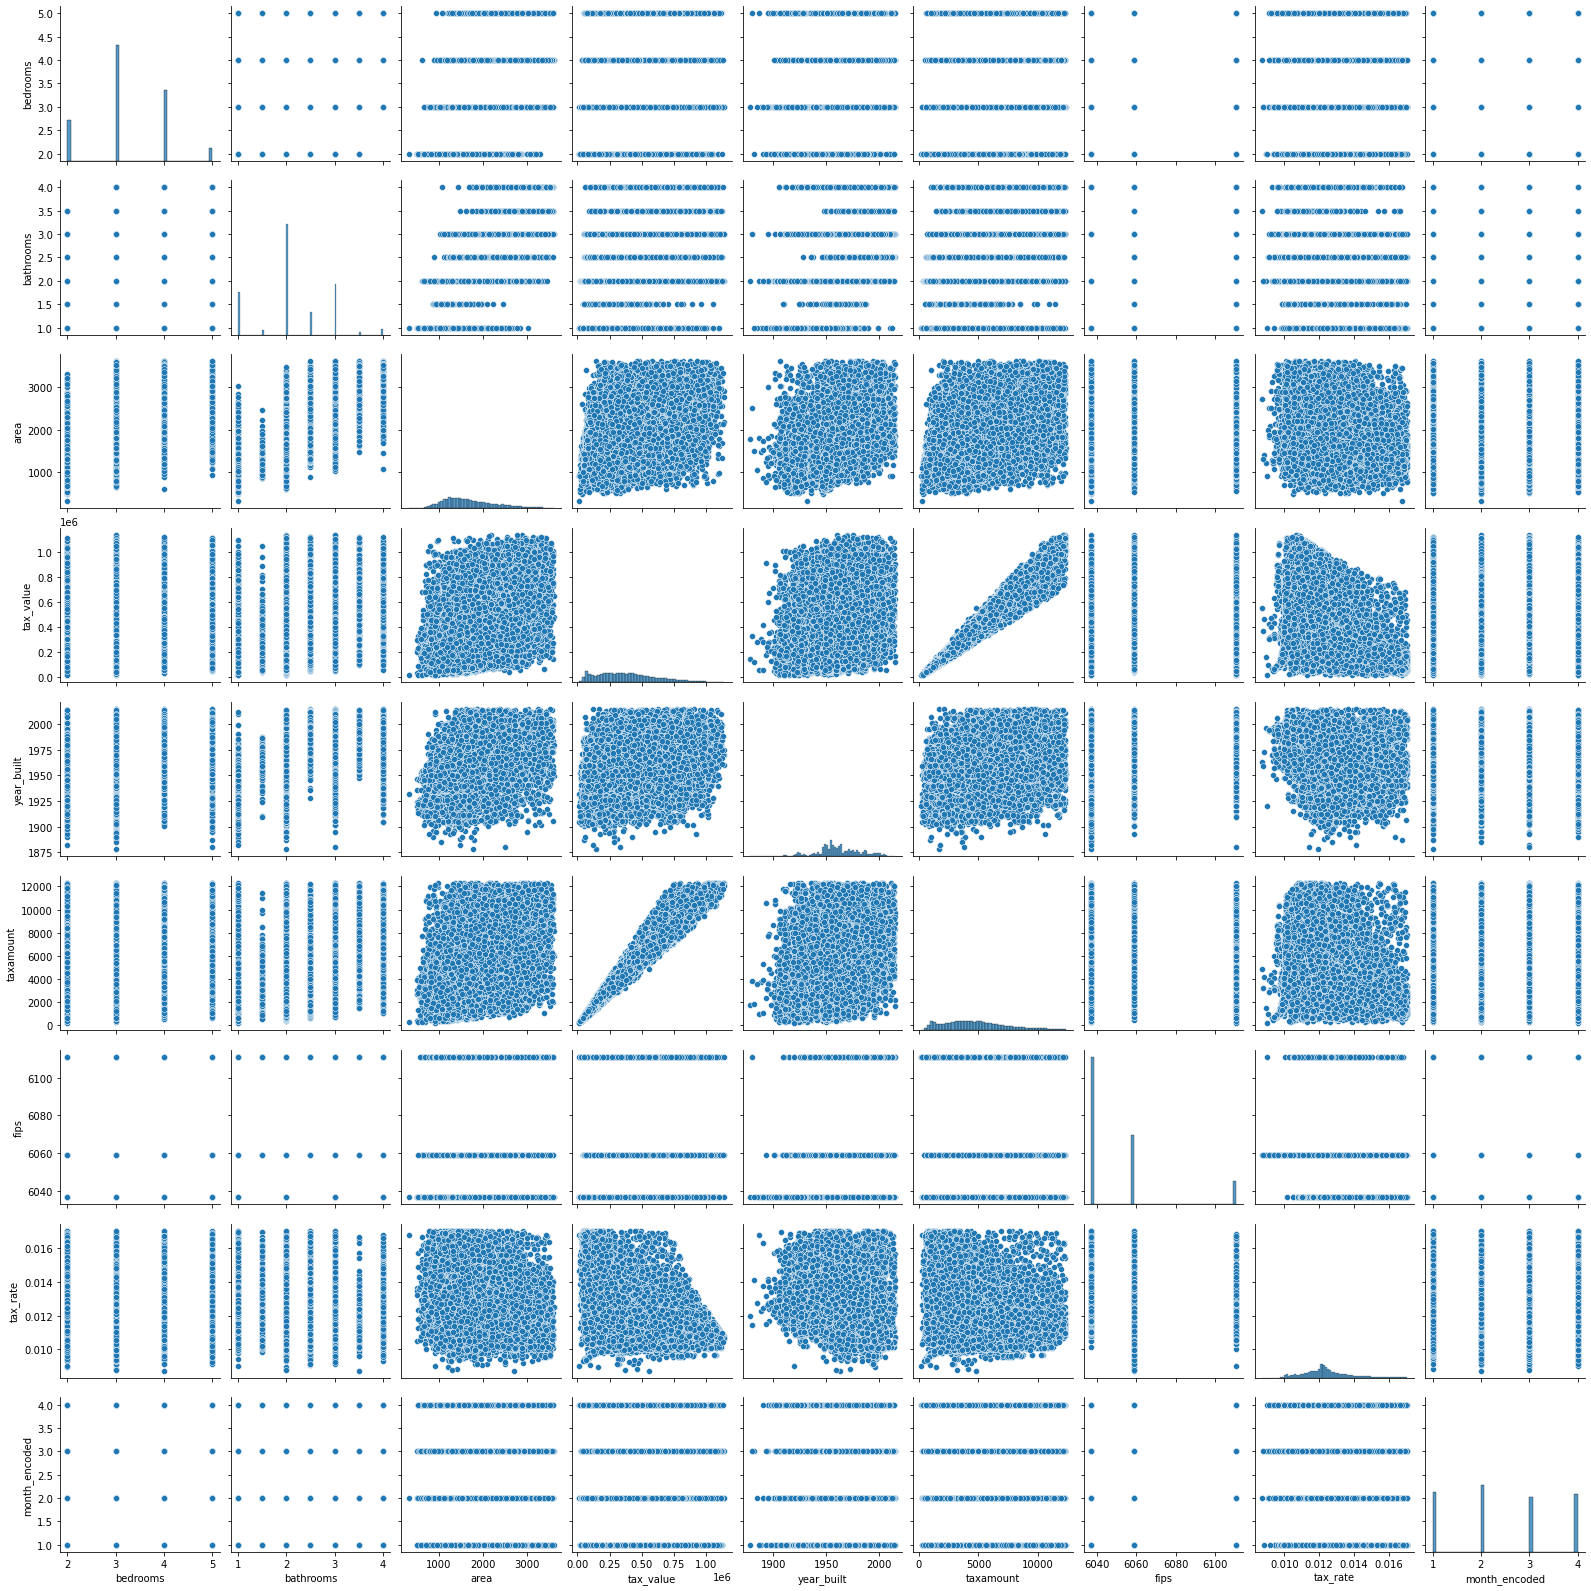

In [68]:
sns.pairplot(df)
plt.show()

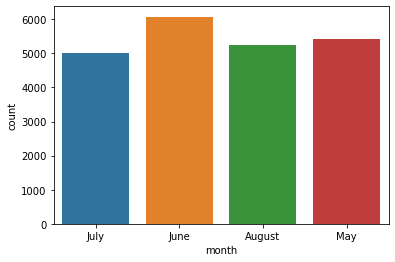

In [61]:
sns.countplot(x=df['month'])
plt.show()

In [62]:
month_value = {'Months':['May','June','July','August'],\
                'tax_value_mean':[(df[df.month=='May'].tax_value.mean()),\
                                  (df[df.month=='June'].tax_value.mean()),\
                                    (df[df.month=='July'].tax_value.mean()),\
                                    (df[df.month=='August'].tax_value.mean())],
              'tax_amount_mean':[(df[df.month=='May'].taxamount.mean()),\
                                  (df[df.month=='June'].taxamount.mean()),\
                                    (df[df.month=='July'].taxamount.mean()),\
                                    (df[df.month=='August'].taxamount.mean())],
              'tax_rate_mean': [(df[df.month=='May'].tax_rate.mean()),\
                                  (df[df.month=='June'].tax_rate.mean()),\
                                    (df[df.month=='July'].tax_rate.mean()),\
                                    (df[df.month=='August'].tax_rate.mean())]}
               
               
month_value_df = pd.DataFrame(data=month_value)

month_value_df

,Months,tax_value_mean,tax_amount_mean,tax_rate_mean
0,May,397314.265757,4794.033155,0.012539
1,June,402203.517616,4865.710818,0.012565
2,July,398397.943302,4808.073835,0.012509
3,August,391599.350419,4722.135257,0.012516


<AxesSubplot:xlabel='Months', ylabel='tax_amount_mean'>

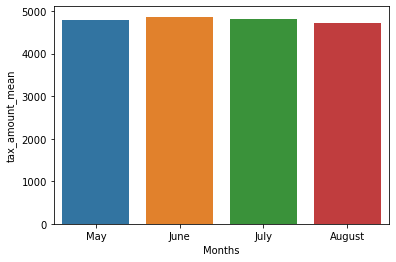

In [60]:
sns.barplot(x='Months',y='tax_amount_mean',data=month_value_df)

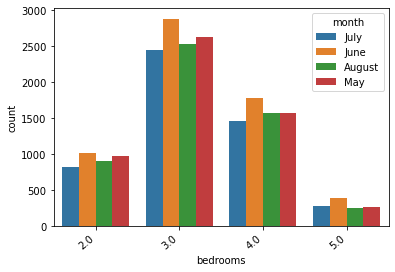

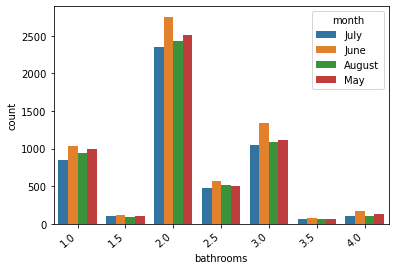

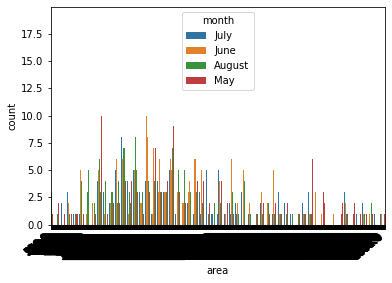

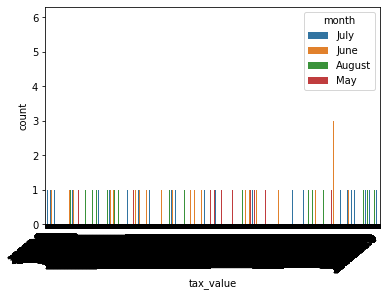

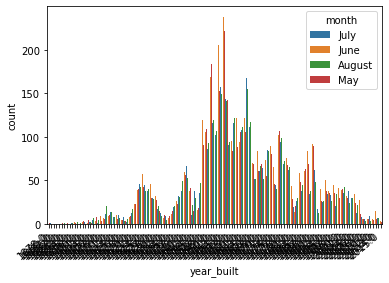

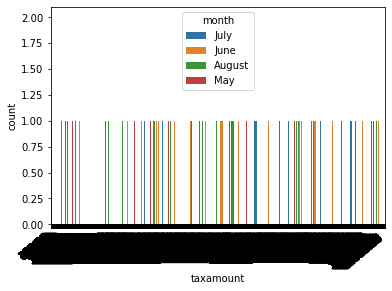

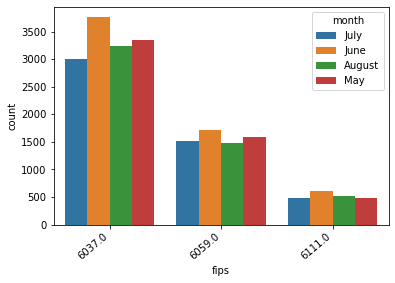

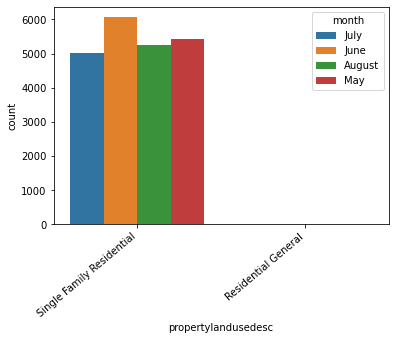

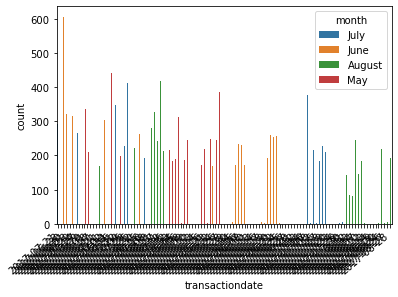

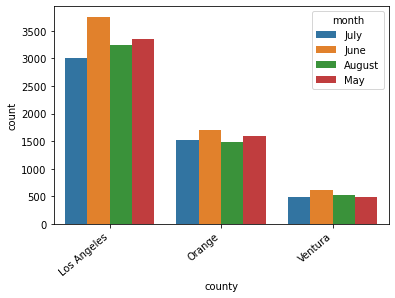

In [ ]:
for col in df.columns:
    ax = sns.countplot(x=df[col], hue='month', data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()